# [FA24-DS] B-Trees - Homework




## **Before you start**

1. Make a copy of this Colab by clicking on File > Save a Copy in Drive
2. Input your first name, last name, and and e-mail address

In [ ]:
#@title  { run: "auto", display-mode: "form" }
first_name = "Eric" #@param {type:"string"}
last_name = "Quezada" #@param {type:"string"}
email_address = "erquezada@miners.utep.edu" #@param {type:"string"}

# **Tracing B-Trees**
### Please upload the tracing for the following problem.

Follow the order of the given values for the keys in the B-Tree. Insert your trace (show how the B-Tree changes for every insertion).

```
keys = [50, 700, -5, 1000, 800, 65, 45, 500, 90, 40, 2000, 600, 60, 80, 200]
max_num_keys = 3


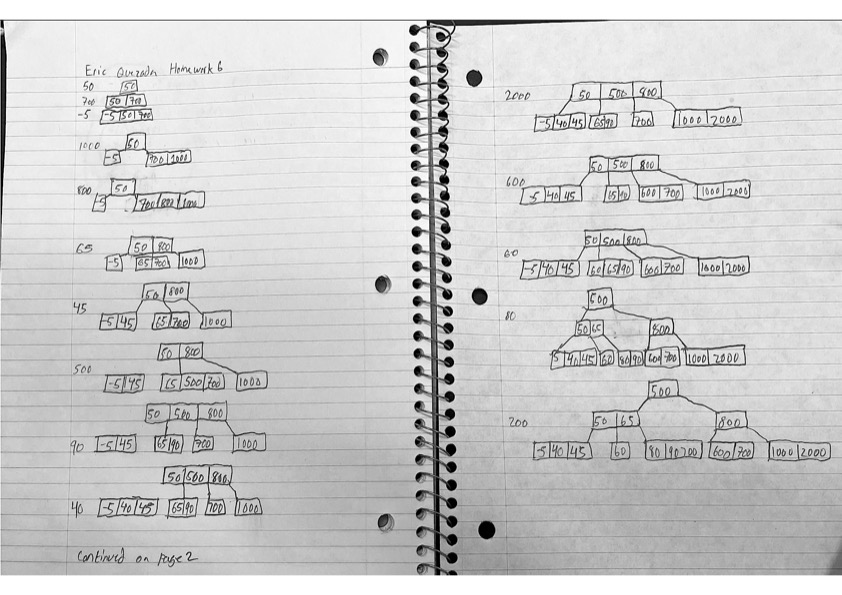*Insert Trace Here*

## Instructions

You will implement 4 different functions for the BTree class found at the bottom of the notebook. Implement each function in its corresponding section found in the code below, then complete the following 2 tasks:

1.  Trace the code using a non-trivial instance of the problem (include a picture / screenshot - needs to done *by hand*)    
2. State the time complexity of the solution. Explain your reasoning.

You are free to test your implementation in the code block below the tree class



### Problem 1
Complete the implementation of the _height method. This method computes the height of a B-tree (The parameter node represents the root of the [sub]tree).  The height of an empty tree is -1. The height of a tree with only one node is 0.

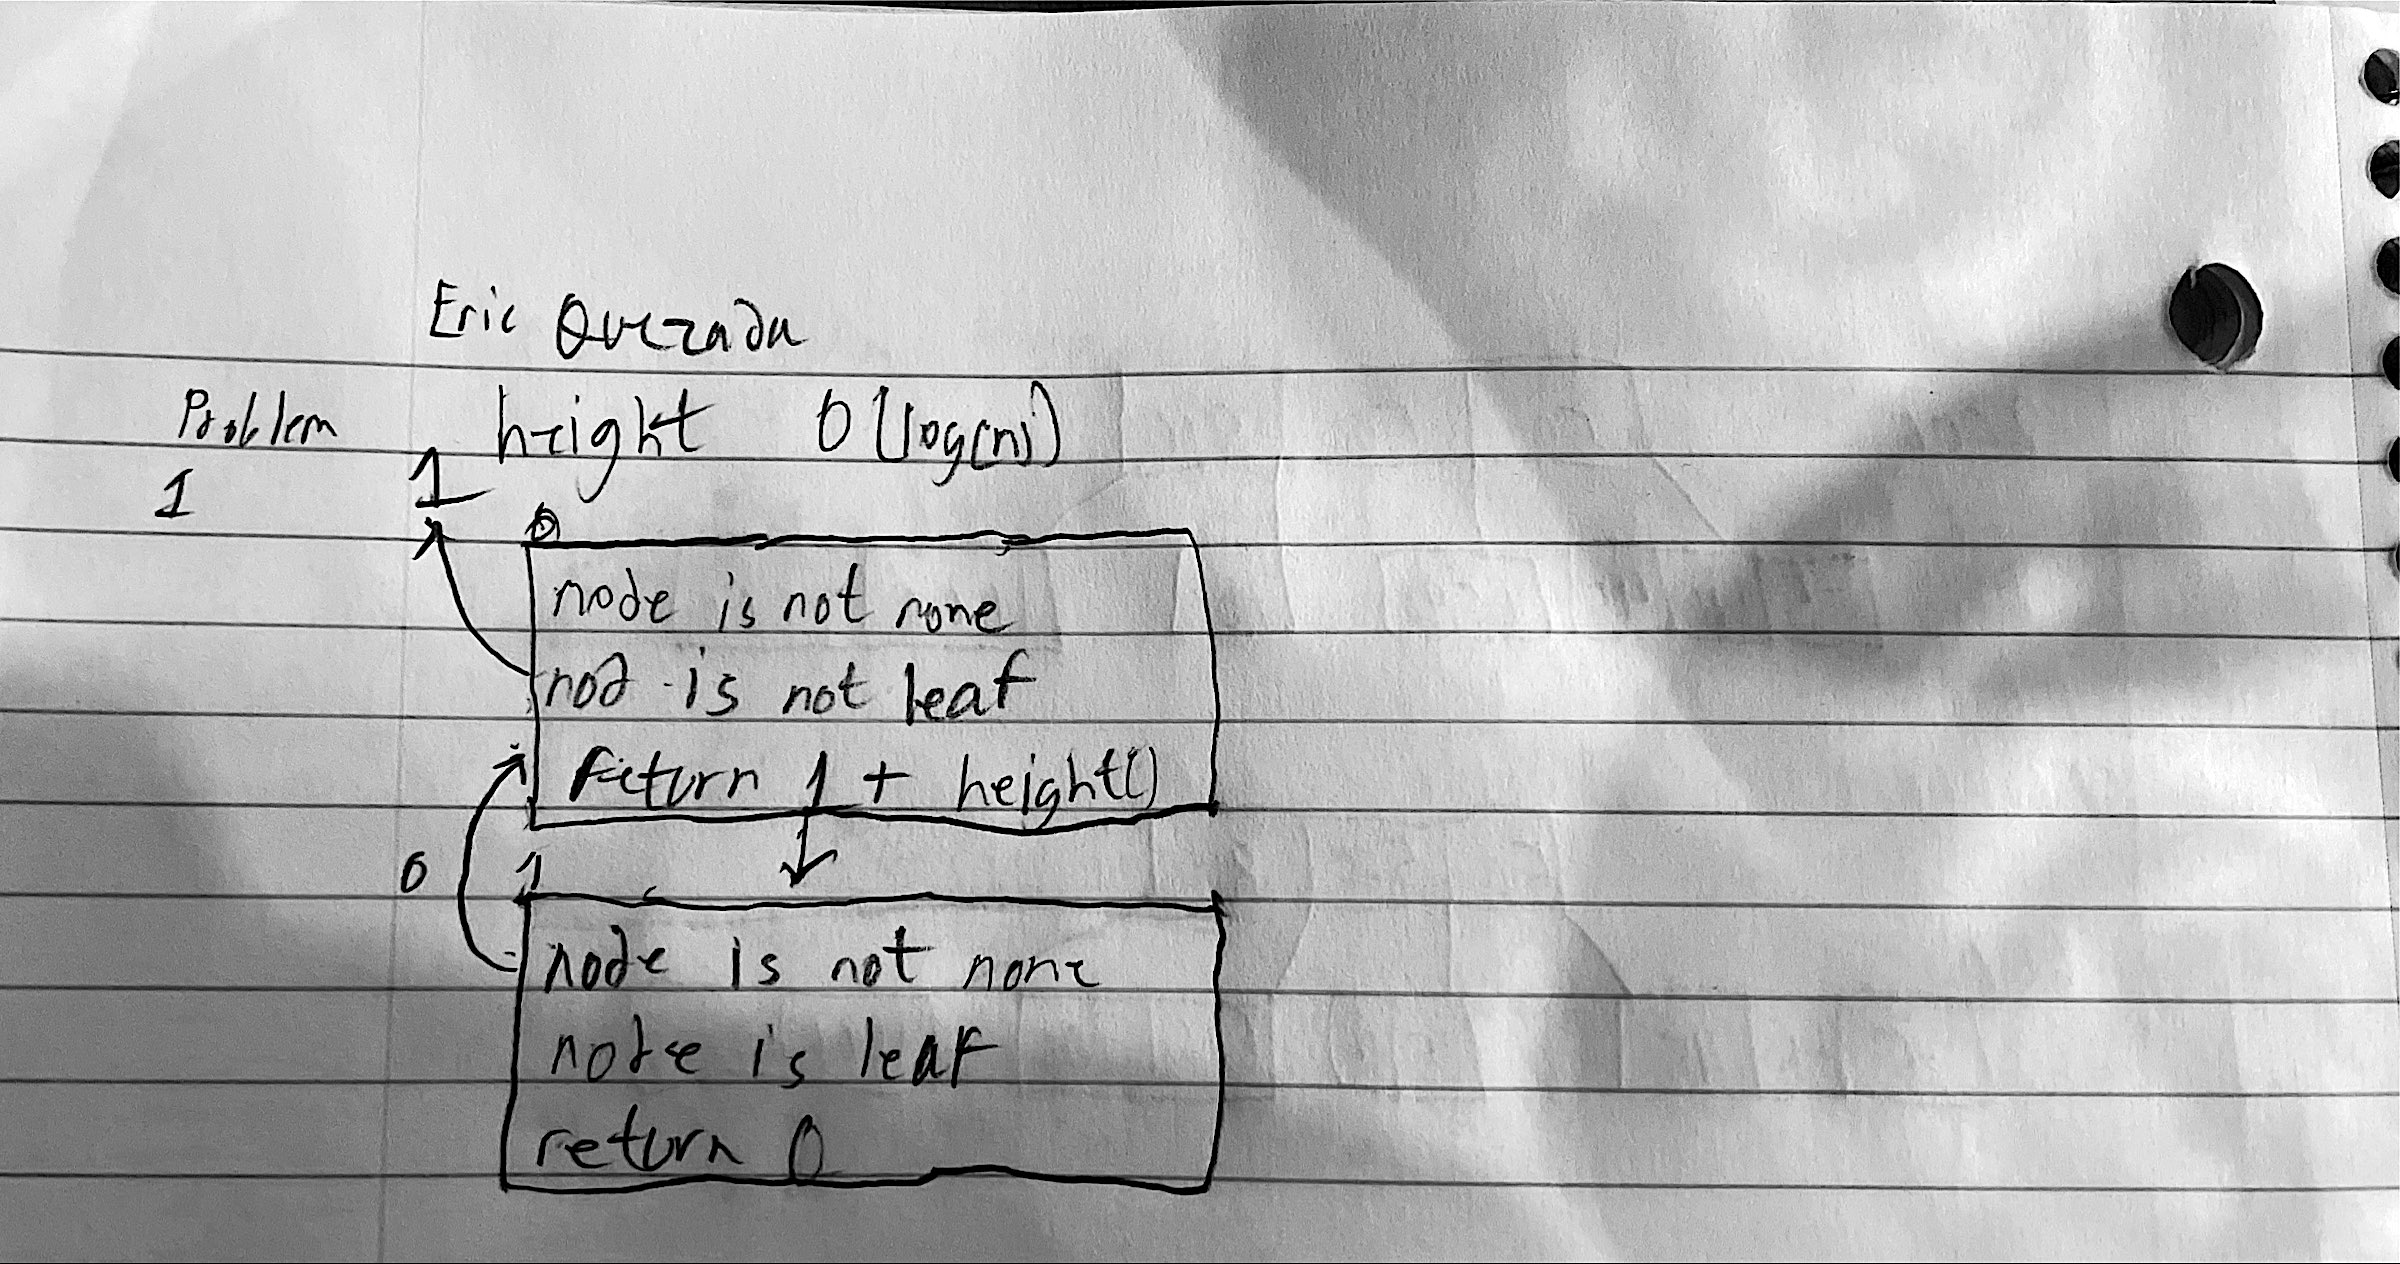

###Problem 2
Complete the implementation of the _num_nodes_at_depth method. This method returns the number of nodes at depth d of a B-tree (The parameter node represents the root of the [sub]tree).

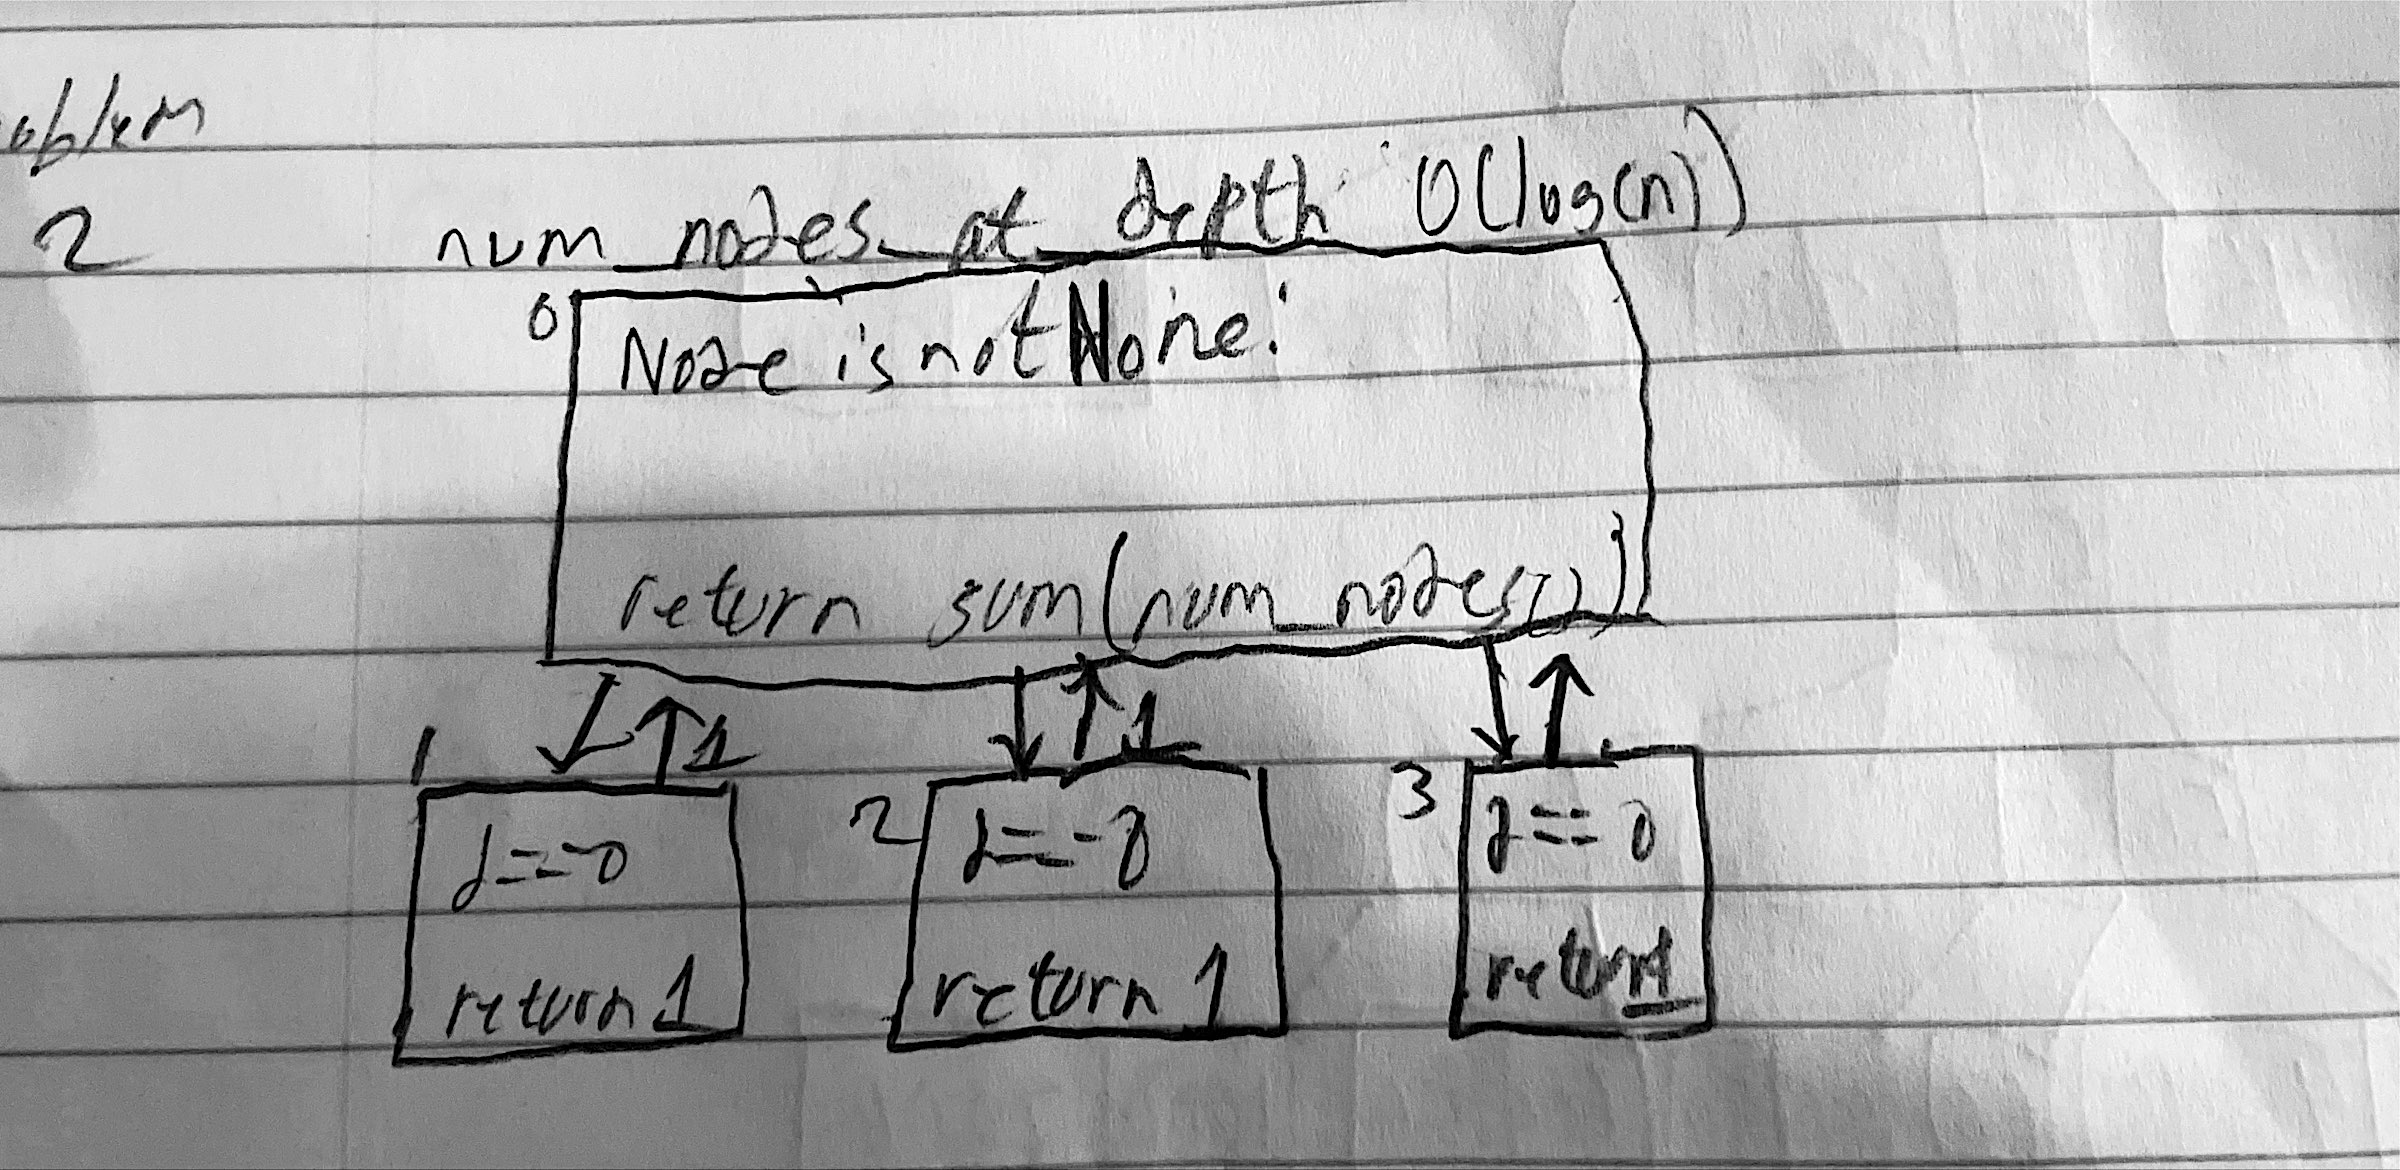

### Problem 3
Complete the implementation of the _max_val_at_depth method. This method returns the largest value in a B-tree at depth d. (The parameter node represents the root of the [sub]tree). If there are no nodes at depth d, return -float("inf").

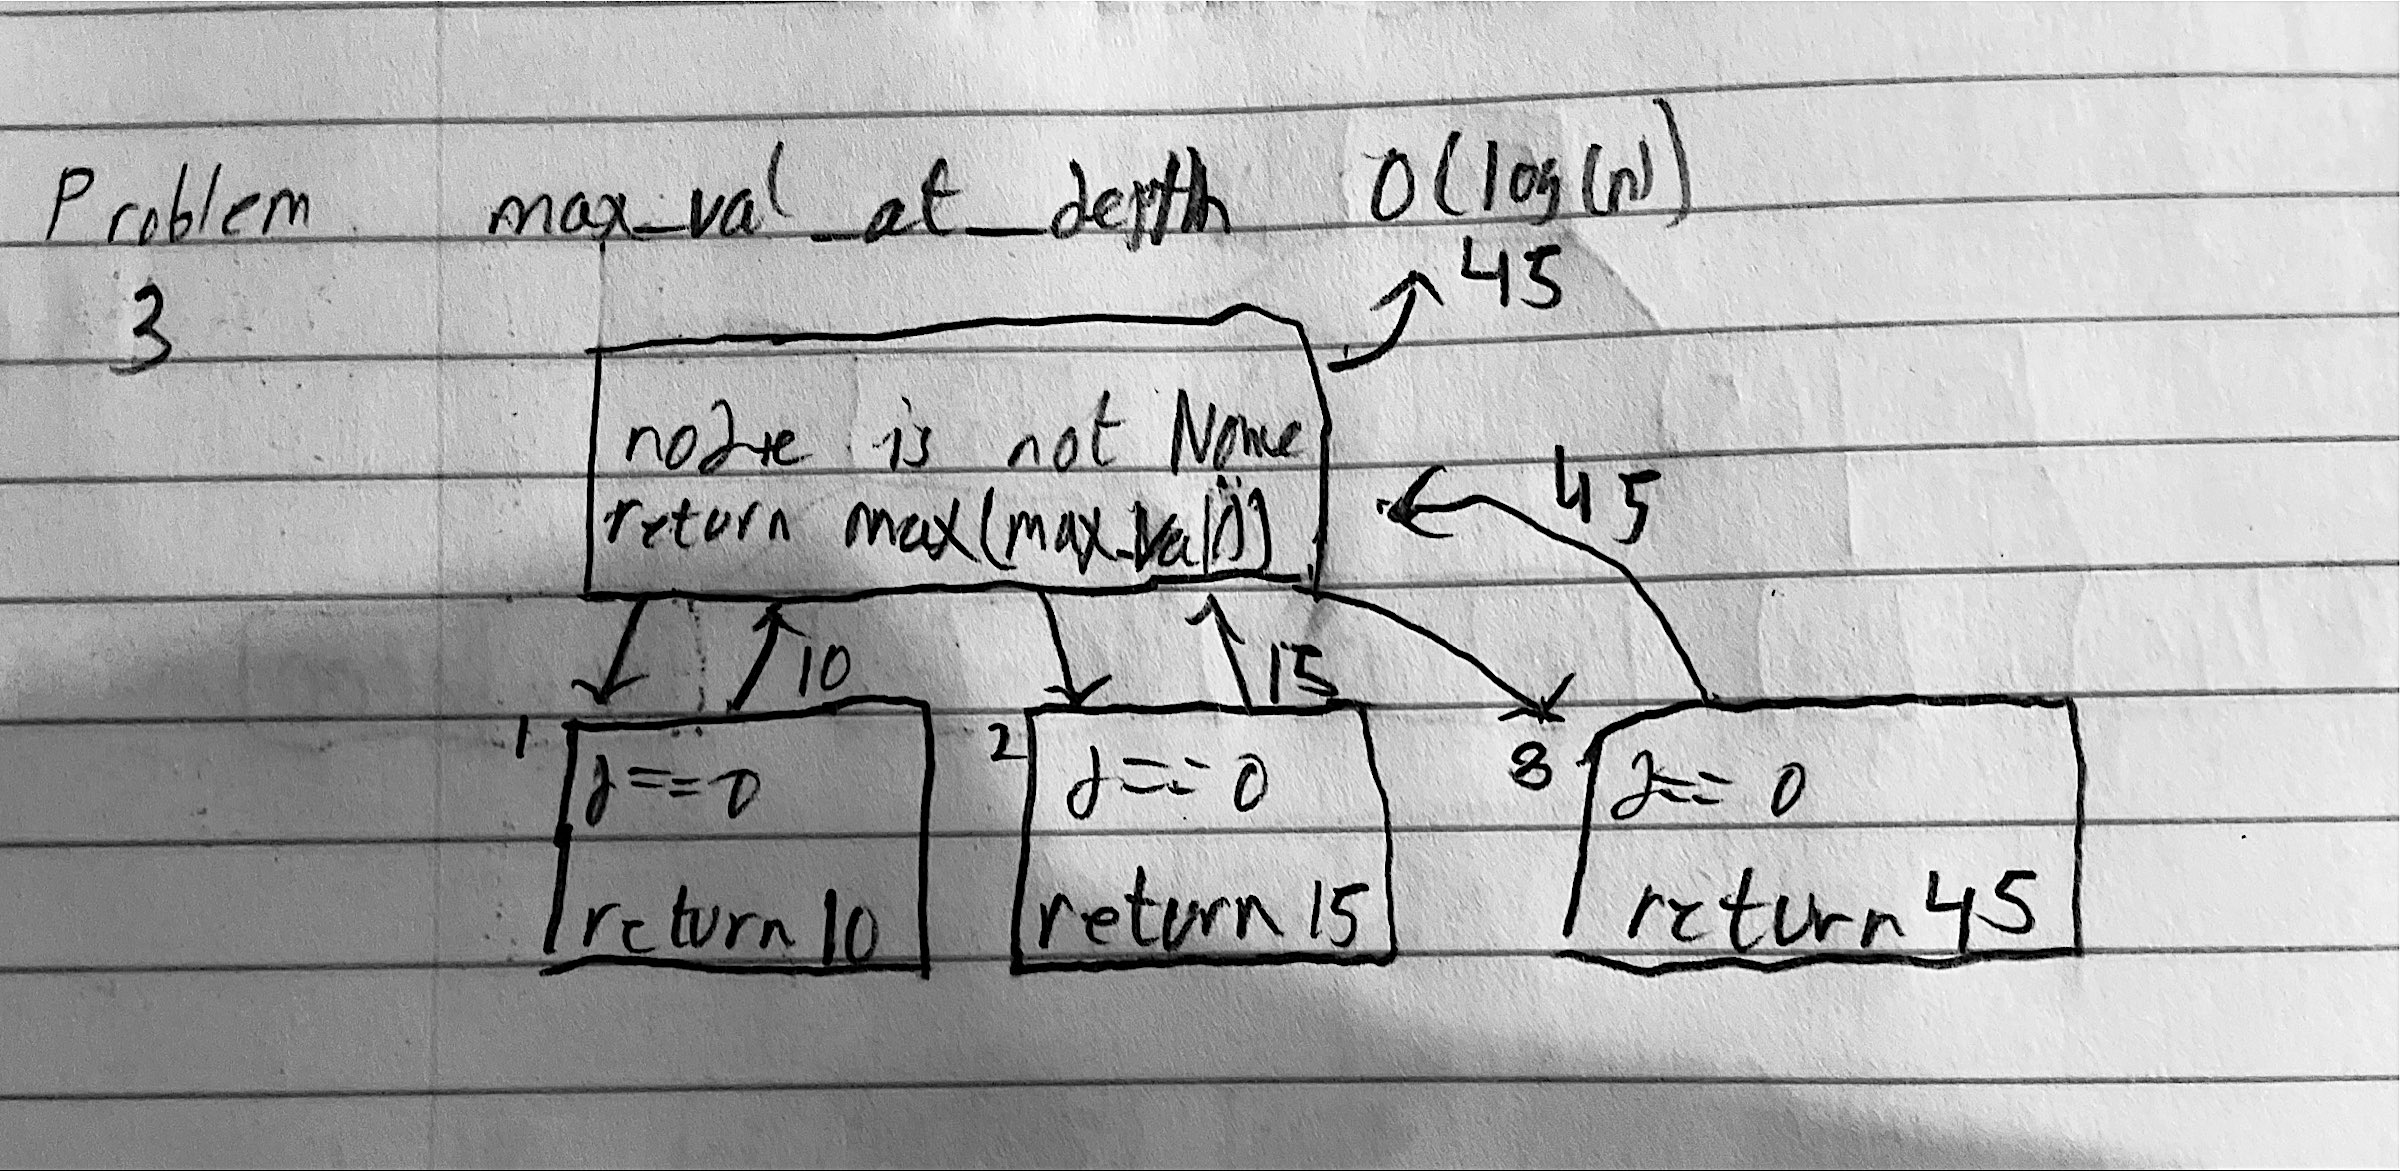

###Problem 4
Complete the implementation of the _search method. This method returns the node where k is, or None if k is not in the tree. (The parameter node represents the root of the [sub]tree).

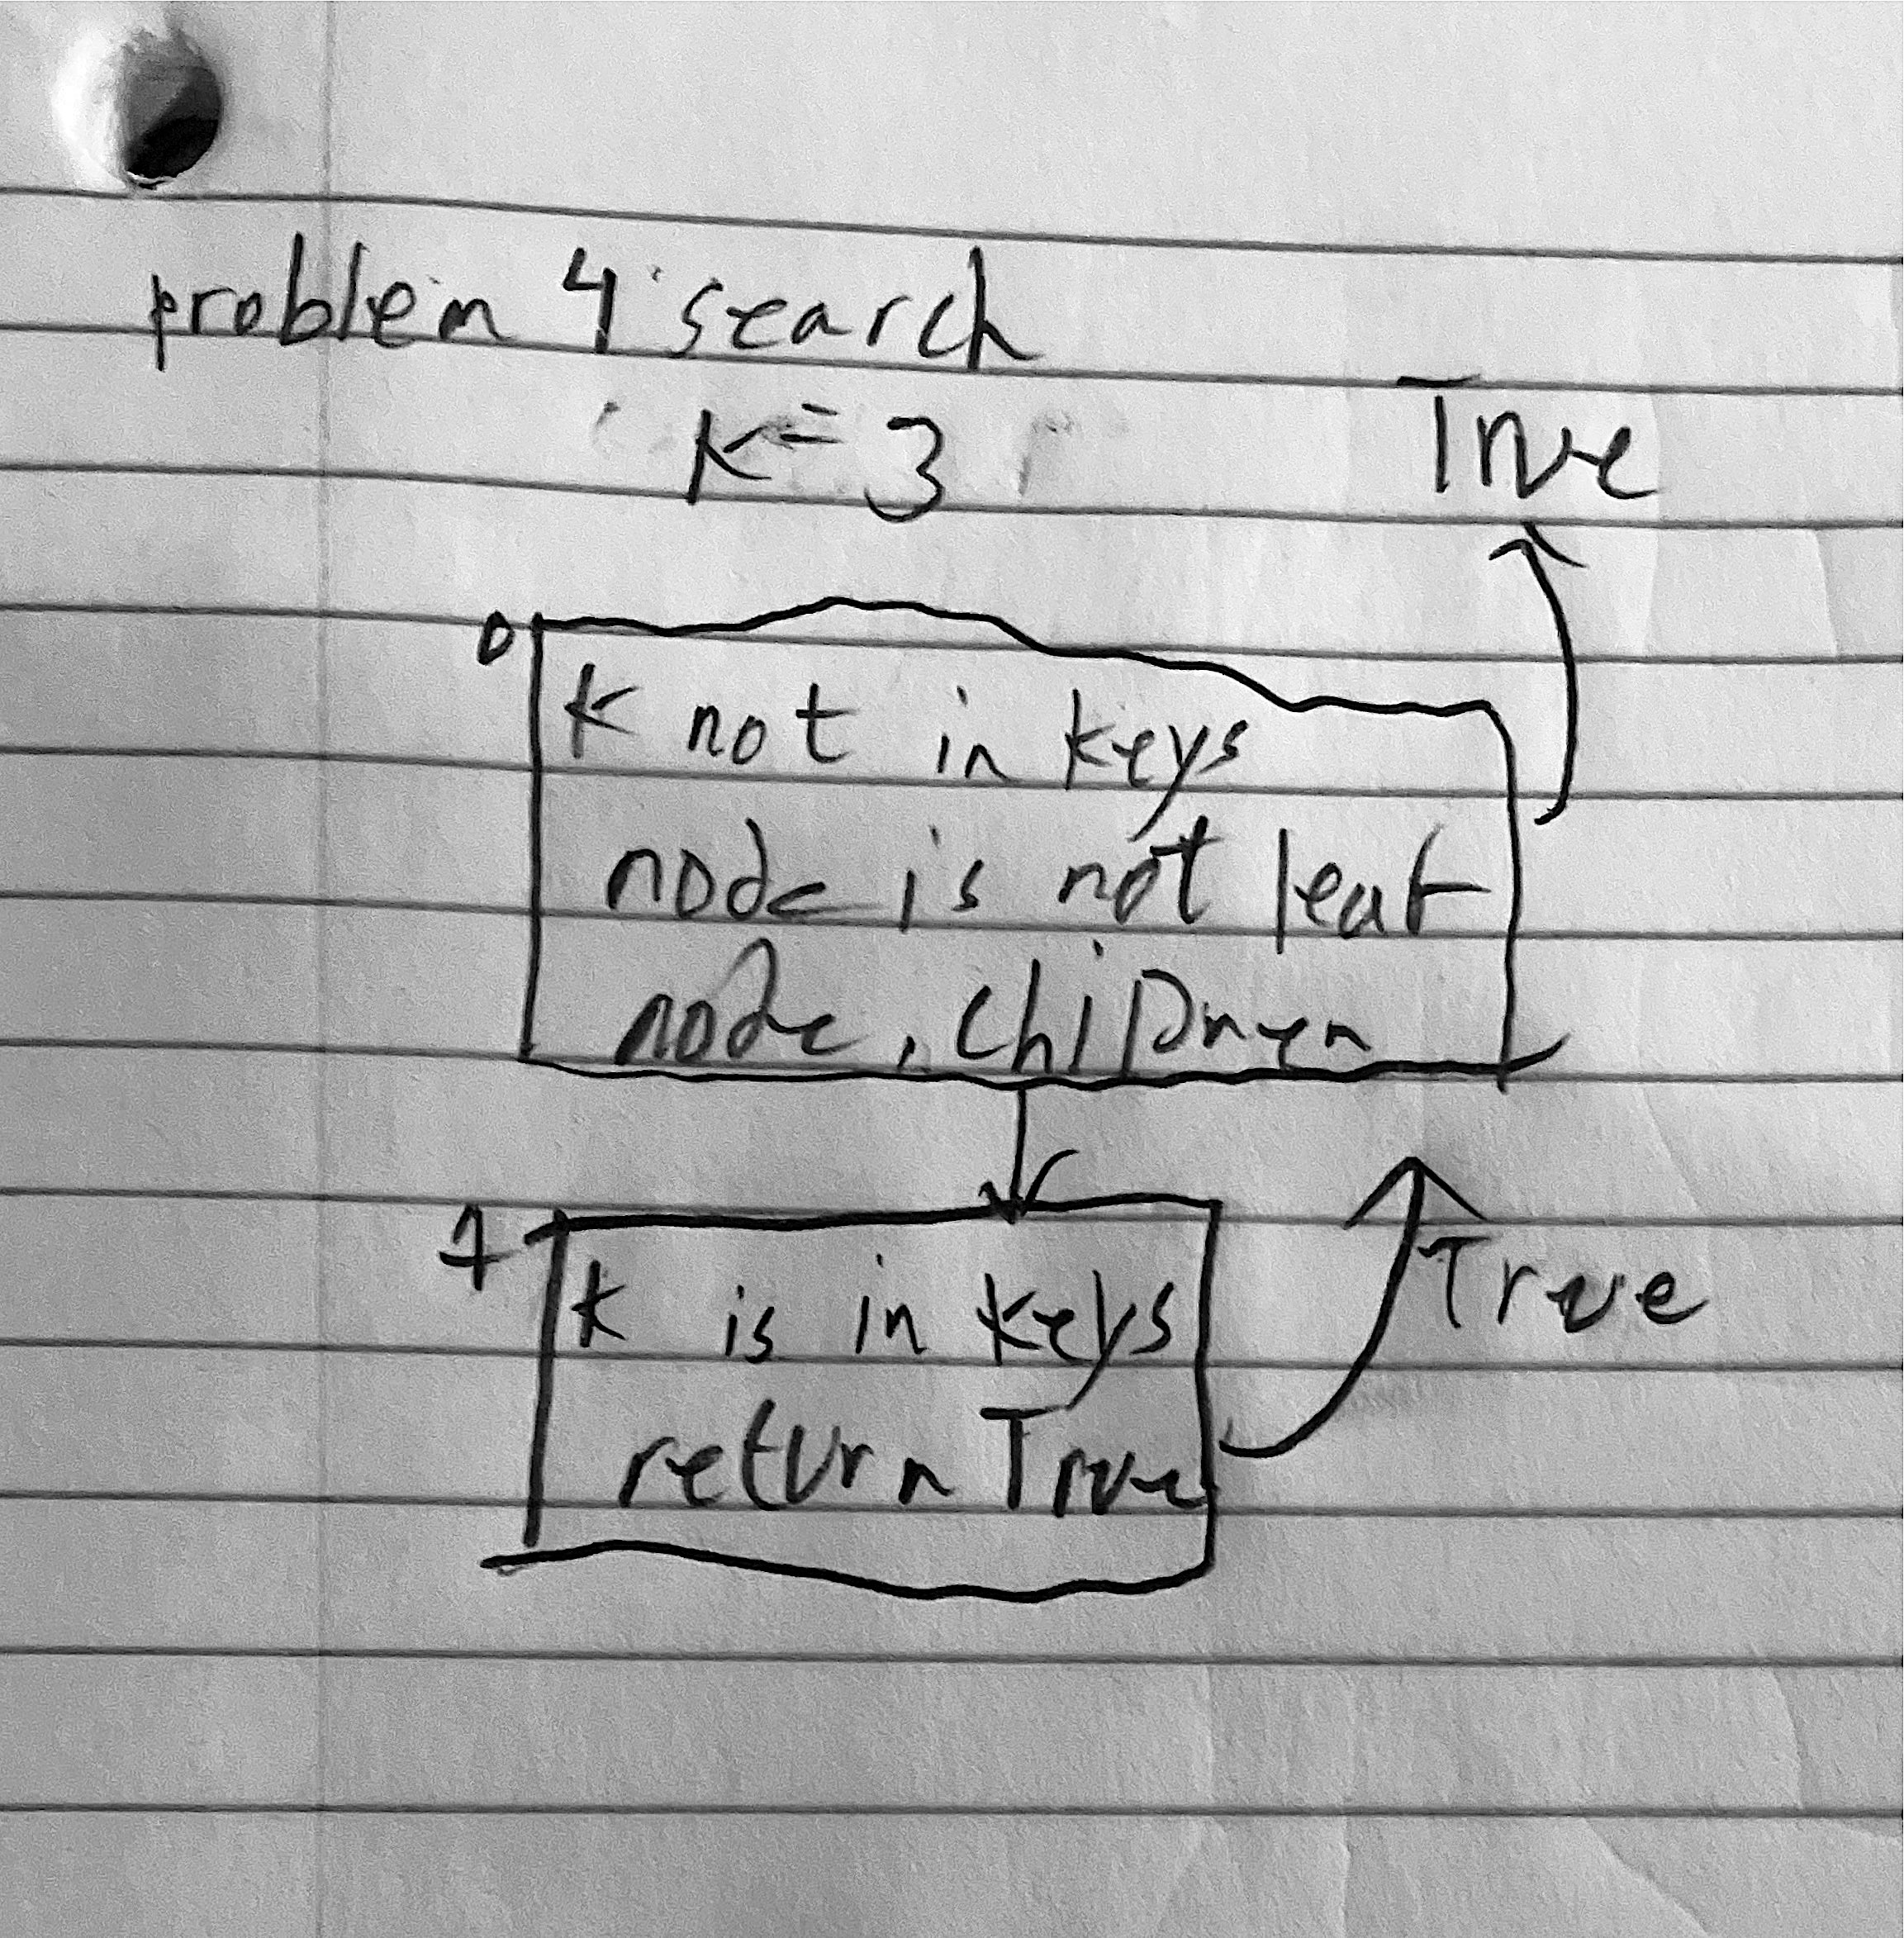Complete tasks 1 and 2:

1. *Insert Trace Here:*
2.

**Time Complexity For (Problem 4) Search: O(log(n))**

In [ ]:
#******************************************************************************
#DO NOT MODIFY THE CODE BELOW
#******************************************************************************
import matplotlib.pyplot as plt
class BTreeNode:
    # Constructor
    def __init__(self, keys=None, children=None, is_leaf=True, max_num_keys=5):
        if keys is None:
            keys = []
        if children is None:
            children = []
        self.keys = keys
        self.children = children
        self.is_leaf = is_leaf
        if max_num_keys < 3:  # max_num_keys must be odd and >= 3
            max_num_keys = 3
        if max_num_keys % 2 == 0:  # max_num_keys must be odd
            max_num_keys += 1
        self.max_num_keys = max_num_keys

    def is_full(self):
        return len(self.keys) >= self.max_num_keys

    def promote(self):
        middle_index = len(self.keys) // 2
        middle_key = self.keys[middle_index]

        left_child = BTreeNode(
            self.keys[:middle_index],
            self.children[:middle_index+1],
            self.is_leaf, self.max_num_keys
            )
        right_child = BTreeNode(
            self.keys[middle_index+1:],
            self.children[middle_index+1:],
            self.is_leaf,
            self.max_num_keys
            )

        return middle_key, left_child, right_child

class BTree:

    # Constructor
    def __init__(self, max_num_keys=5):
        self.max_num_keys = max_num_keys
        self.root = BTreeNode(max_num_keys=max_num_keys)

    def insert(self, key):
        root = self.root
        if root.is_full():
            middle_key, left_child, right_child = root.promote()
            promoted_root = BTreeNode([middle_key], [left_child, right_child], False, self.max_num_keys)
            self.root = promoted_root
            self._insert_unfilled(promoted_root, key)
        else:
            self._insert_unfilled(root, key)

    def _insert_unfilled(self, node, key):
        if node.is_leaf:
            node.keys.append(key)
            node.keys.sort()
        else:
            index = 0
            while index < len(node.keys) and key > node.keys[index]:
                index += 1

            if node.children[index].is_full():
                middle_key, left_child, right_child = node.children[index].promote()
                node.keys.insert(index, middle_key)
                node.children[index] = left_child
                node.children.insert(index + 1, right_child)

                if key > middle_key:
                    index += 1

            self._insert_unfilled(node.children[index], key)

              # Code to draw trees
    def leaves(self):
        return self._leaves(self.root)

    def _leaves(self, node):
        if node.is_leaf:
            return [node.keys]
        s = []
        for c in node.children:
            s = s + self._leaves(c)
        return s

    def _set_x(self, dx, node=None):
        if node is None:
            node = self.root
        if node.is_leaf:
            return
        else:
            for c in node.children:
                self._set_x(dx, c)
            d = (dx[node.children[0].keys[0]] + dx[node.children[-1].keys[0]] + 10 * len(node.children[-1].keys)) / 2
            dx[node.keys[0]] = d - 10 * len(node.keys) / 2

    def _draw_btree(self, dx, y, y_inc, fs, ax, node):
        xs = dx[node.keys[0]]
        if node.is_leaf:
            for itm in node.keys:
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(itm), ha="center", va="center", fontsize=fs)
                xs += 10
        else:
            for i in range(len(node.keys)):
                xc = dx[node.children[i].keys[0]] + 5 * len(node.children[i].keys)
                ax.plot([xs, xs + 10, xs + 10, xs, xs], [y, y, y - 10, y - 10, y], linewidth=1, color='k')
                ax.text(xs + 5, y - 5, str(node.keys[i]), ha="center", va="center", fontsize=fs)
                ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
                self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[i])
                xs += 10
            xc = dx[node.children[-1].keys[0]] + 5 * len(node.children[-1].keys)
            ax.plot([xs, xc], [y - 10, y - y_inc], linewidth=1, color='k')
            self._draw_btree(dx, y - y_inc, y_inc, fs, ax, node.children[-1])

    def draw(self):
        if self.root is None:
          print("<Empty Tree>")
          return
        ll = self.leaves()
        dx = {}
        d = 0
        for l in ll:
            dx[l[0]] = d
            d += 10 * (len(l) + 1)
        self._set_x(dx)
        fig, ax = plt.subplots()
        self._draw_btree(dx, 0, 30, 10, ax, self.root)
        ax.set_aspect(1.0)
        ax.axis('off')
        plt.show()
#******************************************************************************
#DO NOT MODIFY THE CODE ABOVE
#******************************************************************************

    def height(self):
        return self._height(self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 1
    # --------------------------------------------------------------------------------------------------------------
    def _height(self, node):
      # Base Case 1: Empty tree
      if node is None:
        return -1

      # Base Case 2: Leaf node
      if node.is_leaf:
        return 0

      # Recursive Case
      for child in node.children:
        return 1 + max(self._height(child) for child in node.children)
    # --------------------------------------------------------------------------------------------------------------

    def num_nodes_at_depth(self, d):
        return self._num_nodes_at_depth(d, self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 2
    # --------------------------------------------------------------------------------------------------------------
    def _num_nodes_at_depth(self, d, node):
        # Base Case 1: Empty tree
        if node is None:
          return 0

        # Base Case 2: Leaf node
        if d == 0:
          return 1

        # Recursive Case
        count_children = 0 # Initalize counter to zero
        for child in node.children:
          count_children += self._num_nodes_at_depth(d-1, child) # Recursively count the number of children

        return count_children # return count to caller

    # --------------------------------------------------------------------------------------------------------------

    def max_val_at_depth(self, d):
        return self._max_val_at_depth(d, self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 3
    # --------------------------------------------------------------------------------------------------------------
    def _max_val_at_depth(self, d, node):
      # Base Case 1: Check if depth exceeds the height of tree or if it's an empty tree
      if d >= self.height() or node is None:
        return -float("inf")

      # Base Case 2: At the current target depth
      if d == 0:
        if node.keys: # If there values within the node
          return max(node.keys)
        else: #
          return -float("inf") # Else no values were found

      max_value_depth = -float("inf") # Smallest value

      for child in node.children:
        max_value_depth = max(max_value_depth, self._max_val_at_depth(d -1, child)) # Recursively find the max value at deth

      return max_value_depth

    def search(self, k):
        return self._search(k, self.root)

    # --------------------------------------------------------------------------------------------------------------
    # Problem 4
    # --------------------------------------------------------------------------------------------------------------
    def _search(self, k, node):
        # Base Case: Check if empty
        if node is None:
            return False  # Key not found

        # Check if the key is in the current node's keys
        if k in node.keys:
            return True  # Key is found

        # Base case: If it's a leaf node and the key isn't found, return False
        if node.is_leaf:
            return False  # Key is not in the leaf node

        # Recursive case: Find the appropriate child to traverse
        child_index = self._find_child(node, k)

        # Check that node.children[child_index] is a valid node
        if child_index < len(node.children):
            return self._search(k, node.children[child_index])
        else:
            return False  # Invalid child, return False

    # Helper function to find the correct child node to traverse based on key
    def _find_child(self, node, k):
        # Iterate through the keys to find where the key fits
        for i in range(len(node.keys)):
            if node.keys[i] > k:
                return i  # Return the index of the child to the left of the first key larger than k

        # If no such key is found, return the last child (rightmost)
        return len(node.children) - 1


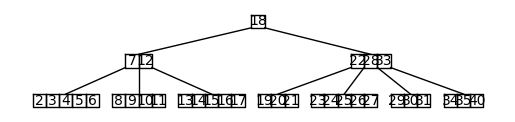

The height of the B-Tree is: 2
The number of nodes at this current depth is: 7
The highest value at the current depthis:  -inf
The value: 15 is in the tree.


In [ ]:
# Create an instance of the BTree with a max number of keys set to 5
btree = BTree(max_num_keys=5)

# Insert values into the BTree
values = [15, 8, 22, 5, 12, 18, 30, 3, 7, 10, 14, 25, 40, 6, 28, 33, 9, 2, 13, 16, 24, 35, 19, 21, 11, 26, 31, 4, 17, 23, 29, 34, 20, 27]
for value in values:
    btree.insert(value)

# Draw the BTree structure
btree.draw()

#Test your code here
search_key = 15  # Set the search key for testing
is_in_tree = btree.search(search_key)


print("The height of the B-Tree is:", btree.height())
print("The number of nodes at this current depth is:", btree.num_nodes_at_depth(2))
print("The highest value at the current depthis: ", btree.max_val_at_depth(2))
print(f"The value: {search_key} is {'in' if is_in_tree else 'not in'} the tree.")

#Feel free to make different trees


## How to Submit

1. File > Download .ipynb
2. Go to Google Classroom, find the submission page, and upload the .ipynb file you just downloaded.